# 第6章: 機械学習
言語処理100本ノック (https://nlp100.github.io/ja/) の第4章です。

## 50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
抽出された事例をランダムに並び替える．
抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
import pandas as pd

df = pd.read_csv("NewsAggregatorDataset/newsCorpora.csv", sep="\t", index_col=0, names=["id", "title", "url", "publisher", "category", "story", "hostname", "timestamp"])
df.head()

,title,url,publisher,category,story,hostname,timestamp
id,,,,,,,
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．

In [2]:
valid_publisher = ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]
df = df.loc[df["publisher"].isin(valid_publisher), :]
df.head()

,title,url,publisher,category,story,hostname,timestamp
id,,,,,,,
13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070


In [3]:
df = df.sample(frac=1, random_state=42)
df = df.reset_index(drop=True)
df.head()

,title,url,publisher,category,story,hostname,timestamp
0,Taco Bell reveals 'secret' ingredients of myst...,http://www.dailymail.co.uk/news/article-261629...,Daily Mail,b,dqycDHxL4IT2bfM80cii2l60F1oaM,www.dailymail.co.uk,1398870059991
1,RPT-UPDATE 2-Carlyle hires JPMorgan's Cavanagh...,http://www.reuters.com/article/2014/03/25/carl...,Reuters,b,d6vEKclqV_iZEsM3pQ3S-2mnaqZUM,www.reuters.com,1395771699595
2,Argentina Deposits $1 Billion For June 30 Bond...,http://www.businessweek.com/news/2014-06-26/ar...,Businessweek,b,dAnZOhVBFIp0-qM-n4Cz0cJ6bJWiM,www.businessweek.com,1403853546347
3,Banksy art work showing government agents spyi...,http://www.dailymail.co.uk/news/article-260378...,Daily Mail,e,dcBt4tU0L52iiTMQ4rip8YRmnr9xM,www.dailymail.co.uk,1397518333460
4,An acrobatic stunt went horribly wrong on Sund...,http://www.dailymail.co.uk/news/article-262058...,Daily Mail,e,dWk63DgdVT-SlcMa4jUUmSMotZ5AM,www.dailymail.co.uk,1399320829491


In [4]:
print(len(df))

13340


In [18]:
total_size = len(df)
train_size = int(0.8*total_size)
valid_size = int(0.1*total_size)
test_size = total_size - train_size - valid_size

train_df = df.iloc[:train_size, :]
valid_df = df.iloc[train_size:train_size+valid_size, :]
test_df = df.iloc[train_size+valid_size:, :]

train_df.to_csv("train.txt", sep="\t")
valid_df.to_csv("valid.txt", sep="\t")
test_df.to_csv("test.txt", sep="\t")

print(len(train_df))
print(len(valid_df))
print(len(test_df))

10672
1334
1334


In [6]:
category_name = list(set(df["category"]))
print(category_name)

['e', 'b', 'm', 't']


In [7]:
train_df.groupby(["category"]).size()

category
b    4530
e    4178
m     739
t    1225
dtype: int64

In [8]:
valid_df.groupby("category").size()

category
b    539
e    560
m     91
t    144
dtype: int64

In [9]:
test_df.groupby("category").size()

category
b    558
e    541
m     80
t    155
dtype: int64

## 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

TFIDFとPublisherを特徴として使用してみる。

In [10]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

tfidf_vectorizer = TfidfVectorizer()
publisher_vectorizer = preprocessing.OneHotEncoder()
category_encoder = preprocessing.LabelEncoder()

tfidf_train = tfidf_vectorizer.fit_transform(train_df["title"]).toarray()
pub_train = np.array(train_df["publisher"])
pub_train = pub_train[:, np.newaxis]
pub_train = publisher_vectorizer.fit_transform(pub_train).toarray()
y_train = category_encoder.fit_transform(train_df["category"])
y_train = y_train[:, np.newaxis]
train_table = np.concatenate([tfidf_train, pub_train, y_train], axis=1)

tfidf_val = tfidf_vectorizer.transform(valid_df["title"]).toarray()
pub_val = np.array(valid_df["publisher"])
pub_val = pub_val[:, np.newaxis]
pub_val = publisher_vectorizer.transform(pub_val).toarray()
y_val = category_encoder.transform(valid_df["category"])
y_val = y_val[:, np.newaxis]
valid_table = np.concatenate([tfidf_val, pub_val, y_val], axis=1)

tfidf_test = tfidf_vectorizer.transform(test_df["title"]).toarray()
pub_test = np.array(test_df["publisher"])
pub_test = pub_test[:, np.newaxis]
pub_test = publisher_vectorizer.transform(pub_test).toarray()
y_test = category_encoder.transform(test_df["category"])
y_test = y_test[:, np.newaxis]
test_table = np.concatenate([tfidf_test, pub_test, y_test], axis=1)

with open("train.feature.txt", "w") as f:
    np.savetxt(f, train_table, delimiter=",")
with open("valid.feature.txt", "w") as f:
    np.savetxt(f, valid_table, delimiter=",")
with open("test.feature.txt", "w") as f:
    np.savetxt(f, test_table, delimiter=",")

## 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
X_train = train_table[:, :-1]
y_train = train_table[:, -1]
model.fit(X_train, y_train)

C:\Users\kiyohiro\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
X_val = valid_table[:, :-1]
y_val = valid_table[:, -1]

pred_val = model.predict(X_val)
print(pred_val[:10], y_val[:10])

[1. 1. 0. 1. 1. 0. 0. 1. 0. 1.] [1. 1. 0. 1. 3. 0. 0. 2. 0. 1.]


## 52. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [47]:
def predict(model, tfidf_vectorizer, publisher_vectorizer, article):
    heading = article["title"]
    publisher = article["publisher"]
    tfidf_feature = tfidf_vectorizer.transform([heading]).toarray()
    pub_feature = np.array([[article["publisher"]]])
    pub_feature = publisher_vectorizer.transform(pub_feature).toarray()
    feature = np.concatenate([tfidf_feature, pub_feature], axis=1)
    pred = model.predict(feature)
    prob = model.predict_proba(feature)
    return pred, prob

In [48]:
test_df.reset_index(inplace=True, drop=True)
test_df.head()

,title,url,publisher,category,story,hostname,timestamp
0,The soberphone app for alcoholics can set off ...,http://www.dailymail.co.uk/sciencetech/article...,Daily Mail,m,dpHGL0G2nz5uNHMyhbG0mnH-YCcAM,www.dailymail.co.uk,1395889717874
1,Check Out These Three New 'Amazing Spider-Man ...,http://www.contactmusic.com/article/the-amazin...,Contactmusic.com,e,dNuwxFDyj7j_V5MwWsFQrjzFGhoMM,www.contactmusic.com,1395065393493
2,Wedding war tears apart Aspen town: New York c...,http://www.dailymail.co.uk/news/article-265730...,Daily Mail,b,dBf7JQWFOpDIJQMbhISAsGw_nRDVM,www.dailymail.co.uk,1402736926882
3,"Look Ma, No Hands: Sergey Brin's GoogleCar Has...",http://www.businessweek.com/articles/2014-05-2...,Businessweek,t,du8-WwxCtj8uy6Mzq9tfSRRix4MHM,www.businessweek.com,1401294972045
4,Japan Whale Hunt Set To Begin With Smaller Cat...,http://www.huffingtonpost.com/2014/04/18/japan...,Huffington Post,t,dBlg8M1Tc52iJXMUO86uQ6UJqxC7M,www.huffingtonpost.com,1397891567501


In [49]:
pred, prob = predict(model, tfidf_vectorizer, publisher_vectorizer, test_df.loc[0, :])
print(pred, prob)

[1.] [[0.1720823  0.34184502 0.17945534 0.30661734]]


## 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ

In [52]:
def predict_df(model, tfidf_vectorizer, publisher_vectorizer, df):
    heading = df["title"]
    publisher = df["publisher"]
    tfidf_feature = tfidf_vectorizer.transform(heading).toarray()
    pub_feature = np.array(df["publisher"])
    pub_feature = pub_feature[:, np.newaxis]
    pub_feature = publisher_vectorizer.transform(pub_feature).toarray()
    feature = np.concatenate([tfidf_feature, pub_feature], axis=1)
    preds = model.predict(feature)
    return preds

In [59]:
def calculate_accuracy(pred, gt):
    return np.mean((pred == gt).astype(np.int32))

In [67]:
train_pred = predict_df(model, tfidf_vectorizer, publisher_vectorizer, train_df).astype(np.int32)

train_gt = category_encoder.fit_transform(train_df["category"])

print(calculate_accuracy(train_pred, train_gt))

0.9335644677661169


In [68]:
test_pred = predict_df(model, tfidf_vectorizer, publisher_vectorizer, test_df).astype(np.int32)

test_gt = category_encoder.fit_transform(test_df["category"])

print(calculate_accuracy(test_pred, test_gt))

0.8875562218890555


## 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

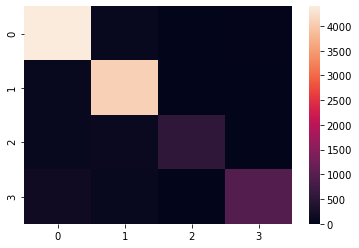

In [71]:
train_cm = confusion_matrix(train_gt, train_pred)
sns.heatmap(train_cm)

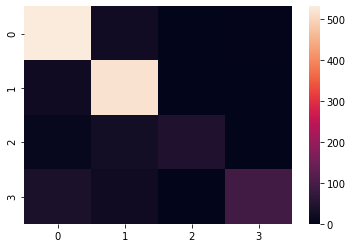

In [73]:
test_cm = confusion_matrix(test_gt, test_pred)
sns.heatmap(test_cm)